In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import math
import random
import warnings
warnings.filterwarnings('ignore')

import keras
from tensorflow import keras
from keras.layers import Dense, Dropout, Flatten, Activation, LSTM
from keras.engine import input_layer
from keras.models import Sequential
from tensorflow.keras import layers


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
#발전기명, 년월일, 설비용량(MW)	01시	02시	03시	04시	05시	06시	07시	08시	09시	10시	11시	12시	13시	14시	15시	16시	17시	18시	19시	20시	21시	22시	23시	24시

dataset1 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_세종.csv', encoding='cp949')
dataset2 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_안산.csv', encoding='cp949')
dataset3 = pd.read_csv('C:/Users/user/Desktop/Jupyter/Data/태양광_영암.csv', encoding='cp949')

dataset1.head()

,발전기명,년월일,설비용량(MW),1,2,3,4,5,6,7,...,15,16,17,18,19,20,21,22,23,24
0,세종시폐기물매립장태양광,2017-01-01,1.628,0,0,0,0,0,0,0,...,742080,334440,87240,2880,4320,0,0,0,0,0
1,세종시폐기물매립장태양광,2017-01-02,1.628,0,0,0,0,0,0,0,...,606360,501120,158280,2760,3360,0,0,0,0,0
2,세종시폐기물매립장태양광,2017-01-03,1.628,0,0,0,0,0,0,0,...,881040,557040,128640,2280,3000,0,0,0,0,0
3,세종시폐기물매립장태양광,2017-01-04,1.628,0,0,0,0,0,0,0,...,677280,502320,112080,1800,2760,0,0,0,0,0
4,세종시폐기물매립장태양광,2017-01-05,1.628,0,0,0,0,0,0,0,...,259560,138840,45000,2520,2880,0,0,0,0,0


### * nan 값 0으로 대체

In [3]:
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("Before : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)

dataset1, dataset2, dataset3 = dataset1.fillna(0), dataset2.fillna(0), dataset3.fillna(0)
total_nan_dataset1, total_nan_dataset2, total_nan_dataset3 = dataset1.isnull().sum().sum(), dataset2.isnull().sum().sum(), dataset3.isnull().sum().sum()

print("After : ", total_nan_dataset1, total_nan_dataset2, total_nan_dataset3)


Before :  0 0 0
After :  0 0 0


In [4]:
new_dataset1, new_dataset2, new_dataset3 = [], [], []

for i in range(len(dataset1)):
    new_dataset1.extend(dataset1.iloc[i,3:])

for i in range(len(dataset2)):
    new_dataset2.extend(dataset2.iloc[i,3:])

for i in range(len(dataset3)):
    new_dataset3.extend(dataset3.iloc[i,3:])
    
len(new_dataset1), len(new_dataset2), len(new_dataset3)

(40608, 40608, 40608)

In [5]:
df = pd.DataFrame({'local1':new_dataset1,
                   'local2':new_dataset2,
                   'local3':new_dataset3})


train_dataset = df.sample(frac=0.857,random_state=0)
test_dataset = df.drop(train_dataset.index)

train_stats = train_dataset.describe()
train_stats.pop("local3")
train_stats = train_stats.transpose()

#레이블
train_labels = train_dataset.pop('local3')
test_labels = test_dataset.pop('local3')

def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data = np.array(normed_train_data)
normed_test_data = np.array(normed_test_data)

normed_train_data = np.reshape(normed_train_data, (normed_train_data.shape[0], 1, normed_train_data.shape[1]))
normed_test_data = np.reshape(normed_test_data, (normed_test_data.shape[0], 1, normed_test_data.shape[1]))

In [9]:
def build_model():
    model = keras.Sequential([
    layers.LSTM(64, activation='relu', input_shape=(1,len(train_dataset.keys()))),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
      ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',  optimizer='adam', metrics=['mae', 'mse'])
    return model

In [10]:
model = build_model()

In [11]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #bactch_size

Epoch 1/1000
870/870 [==============================] - 12s 5ms/step - loss: 13200325083136.0000 - mae: 2006640.2500 - mse: 13200325083136.0000 - val_loss: 8139561762816.0000 - val_mae: 1560676.0000 - val_mse: 8139561762816.0000
Epoch 2/1000
870/870 [==============================] - 3s 4ms/step - loss: 3357446242304.0000 - mae: 955620.0625 - mse: 3357446242304.0000 - val_loss: 1938389336064.0000 - val_mae: 708747.5000 - val_mse: 1938389336064.0000
Epoch 3/1000
870/870 [==============================] - 3s 3ms/step - loss: 1916993142784.0000 - mae: 730686.5000 - mse: 1916993142784.0000 - val_loss: 1811529990144.0000 - val_mae: 732505.0625 - val_mse: 1811529990144.0000
Epoch 4/1000
870/870 [==============================] - 3s 3ms/step - loss: 1842665750528.0000 - mae: 768001.9375 - mse: 1842665750528.0000 - val_loss: 1769305145344.0000 - val_mae: 759261.3750 - val_mse: 1769305145344.0000
Epoch 5/1000
870/870 [==============================] - 3s 3ms/step - loss: 1807089926144.0000 - ma

870/870 [==============================] - 3s 4ms/step - loss: 1669662375936.0000 - mae: 684324.9375 - mse: 1669662375936.0000 - val_loss: 1602845147136.0000 - val_mae: 674951.6250 - val_mse: 1602845147136.0000
Epoch 38/1000
870/870 [==============================] - 3s 3ms/step - loss: 1670689980416.0000 - mae: 686839.5625 - mse: 1670689980416.0000 - val_loss: 1599171592192.0000 - val_mae: 664502.4375 - val_mse: 1599171592192.0000
Epoch 39/1000
870/870 [==============================] - 3s 3ms/step - loss: 1669989007360.0000 - mae: 683999.1250 - mse: 1669989007360.0000 - val_loss: 1597893378048.0000 - val_mae: 666418.8750 - val_mse: 1597893378048.0000
Epoch 40/1000
870/870 [==============================] - 3s 3ms/step - loss: 1669825298432.0000 - mae: 685046.3125 - mse: 1669825298432.0000 - val_loss: 1597954981888.0000 - val_mae: 663084.1250 - val_mse: 1597954981888.0000
Epoch 41/1000
870/870 [==============================] - 3s 3ms/step - loss: 1669983502336.0000 - mae: 683468.7500

870/870 [==============================] - 3s 3ms/step - loss: 1665241841664.0000 - mae: 662710.5000 - mse: 1665241841664.0000 - val_loss: 1592215207936.0000 - val_mae: 644374.5000 - val_mse: 1592215207936.0000
Epoch 74/1000
870/870 [==============================] - 3s 3ms/step - loss: 1665550778368.0000 - mae: 663213.1875 - mse: 1665550778368.0000 - val_loss: 1591712022528.0000 - val_mae: 641479.0625 - val_mse: 1591712022528.0000
Epoch 75/1000
870/870 [==============================] - 3s 3ms/step - loss: 1665284308992.0000 - mae: 661827.5000 - mse: 1665284308992.0000 - val_loss: 1595141914624.0000 - val_mae: 644269.8125 - val_mse: 1595141914624.0000
Epoch 76/1000
870/870 [==============================] - 3s 3ms/step - loss: 1665062797312.0000 - mae: 661981.1250 - mse: 1665062797312.0000 - val_loss: 1591884775424.0000 - val_mae: 641434.0000 - val_mse: 1591884775424.0000
Epoch 77/1000
870/870 [==============================] - 3s 3ms/step - loss: 1665152712704.0000 - mae: 661653.5625

870/870 [==============================] - 3s 3ms/step - loss: 1663127650304.0000 - mae: 653540.2500 - mse: 1663127650304.0000 - val_loss: 1589173682176.0000 - val_mae: 631997.6250 - val_mse: 1589173682176.0000
Epoch 110/1000
870/870 [==============================] - 3s 3ms/step - loss: 1662788304896.0000 - mae: 652825.6875 - mse: 1662788304896.0000 - val_loss: 1589486682112.0000 - val_mae: 635813.8125 - val_mse: 1589486682112.0000
Epoch 111/1000
870/870 [==============================] - 3s 3ms/step - loss: 1662950440960.0000 - mae: 653040.1875 - mse: 1662950440960.0000 - val_loss: 1589619326976.0000 - val_mae: 640345.9375 - val_mse: 1589619326976.0000
Epoch 112/1000
870/870 [==============================] - 3s 3ms/step - loss: 1662807965696.0000 - mae: 653660.0000 - mse: 1662807965696.0000 - val_loss: 1589061222400.0000 - val_mae: 632679.5000 - val_mse: 1589061222400.0000
Epoch 113/1000
870/870 [==============================] - 3s 3ms/step - loss: 1662643732480.0000 - mae: 652066.

870/870 [==============================] - 3s 3ms/step - loss: 1662396268544.0000 - mae: 650917.3125 - mse: 1662396268544.0000 - val_loss: 1588683472896.0000 - val_mae: 628635.3750 - val_mse: 1588683472896.0000
Epoch 146/1000
870/870 [==============================] - 3s 4ms/step - loss: 1662304518144.0000 - mae: 650814.0000 - mse: 1662304518144.0000 - val_loss: 1589899952128.0000 - val_mae: 630479.5000 - val_mse: 1589899952128.0000
Epoch 147/1000
870/870 [==============================] - 3s 3ms/step - loss: 1662251171840.0000 - mae: 650744.8750 - mse: 1662251171840.0000 - val_loss: 1588814413824.0000 - val_mae: 628451.1875 - val_mse: 1588814413824.0000
Epoch 148/1000
870/870 [==============================] - 3s 4ms/step - loss: 1660458369024.0000 - mae: 649330.8750 - mse: 1660458369024.0000 - val_loss: 1590278881280.0000 - val_mae: 635331.1250 - val_mse: 1590278881280.0000
Epoch 149/1000
870/870 [==============================] - 3s 4ms/step - loss: 1661279928320.0000 - mae: 650136.

870/870 [==============================] - 3s 3ms/step - loss: 1661740646400.0000 - mae: 650136.8125 - mse: 1661740646400.0000 - val_loss: 1589071446016.0000 - val_mae: 628697.8125 - val_mse: 1589071446016.0000
Epoch 182/1000
870/870 [==============================] - 3s 3ms/step - loss: 1661105602560.0000 - mae: 649627.8750 - mse: 1661105602560.0000 - val_loss: 1589570174976.0000 - val_mae: 637470.8750 - val_mse: 1589570174976.0000
Epoch 183/1000
870/870 [==============================] - 3s 3ms/step - loss: 1661965828096.0000 - mae: 649159.3125 - mse: 1661965828096.0000 - val_loss: 1589279850496.0000 - val_mae: 634876.9375 - val_mse: 1589279850496.0000
Epoch 184/1000
870/870 [==============================] - 3s 3ms/step - loss: 1661981556736.0000 - mae: 649858.9375 - mse: 1661981556736.0000 - val_loss: 1588981530624.0000 - val_mae: 632706.8125 - val_mse: 1588981530624.0000
Epoch 185/1000
870/870 [==============================] - 3s 3ms/step - loss: 1661128933376.0000 - mae: 649415.

870/870 [==============================] - 3s 3ms/step - loss: 1660817768448.0000 - mae: 649360.5625 - mse: 1660817768448.0000 - val_loss: 1589795749888.0000 - val_mae: 625068.3125 - val_mse: 1589795749888.0000
Epoch 218/1000
870/870 [==============================] - 3s 3ms/step - loss: 1660666511360.0000 - mae: 649139.2500 - mse: 1660666511360.0000 - val_loss: 1591263363072.0000 - val_mae: 628335.1250 - val_mse: 1591263363072.0000
Epoch 219/1000
870/870 [==============================] - 3s 3ms/step - loss: 1661243359232.0000 - mae: 648261.3125 - mse: 1661243359232.0000 - val_loss: 1589471608832.0000 - val_mae: 630767.0625 - val_mse: 1589471608832.0000
Epoch 220/1000
870/870 [==============================] - 3s 3ms/step - loss: 1661021585408.0000 - mae: 649847.0000 - mse: 1661021585408.0000 - val_loss: 1590010183680.0000 - val_mae: 623398.7500 - val_mse: 1590010183680.0000
Epoch 221/1000
870/870 [==============================] - 3s 3ms/step - loss: 1660933767168.0000 - mae: 648435.

870/870 [==============================] - 2s 3ms/step - loss: 1660983312384.0000 - mae: 649164.5000 - mse: 1660983312384.0000 - val_loss: 1589419835392.0000 - val_mae: 632990.5000 - val_mse: 1589419835392.0000
Epoch 254/1000
870/870 [==============================] - 2s 3ms/step - loss: 1659673640960.0000 - mae: 648562.4375 - mse: 1659673640960.0000 - val_loss: 1591699701760.0000 - val_mae: 626834.4375 - val_mse: 1591699701760.0000
Epoch 255/1000
870/870 [==============================] - 2s 3ms/step - loss: 1660256911360.0000 - mae: 648051.0000 - mse: 1660256911360.0000 - val_loss: 1591291281408.0000 - val_mae: 634034.1875 - val_mse: 1591291281408.0000
Epoch 256/1000
870/870 [==============================] - 2s 3ms/step - loss: 1660574892032.0000 - mae: 648834.6250 - mse: 1660574892032.0000 - val_loss: 1589619589120.0000 - val_mae: 632946.3125 - val_mse: 1589619589120.0000
Epoch 257/1000
870/870 [==============================] - 2s 3ms/step - loss: 1659745730560.0000 - mae: 648388.

870/870 [==============================] - 2s 3ms/step - loss: 1659742584832.0000 - mae: 648113.0625 - mse: 1659742584832.0000 - val_loss: 1589291384832.0000 - val_mae: 630474.6875 - val_mse: 1589291384832.0000
Epoch 290/1000
870/870 [==============================] - 2s 3ms/step - loss: 1660342763520.0000 - mae: 648622.0625 - mse: 1660342763520.0000 - val_loss: 1592848547840.0000 - val_mae: 626624.7500 - val_mse: 1592848547840.0000
Epoch 291/1000
870/870 [==============================] - 2s 3ms/step - loss: 1660519317504.0000 - mae: 647963.5000 - mse: 1660519317504.0000 - val_loss: 1589362425856.0000 - val_mae: 628181.9375 - val_mse: 1589362425856.0000
Epoch 292/1000
870/870 [==============================] - 2s 2ms/step - loss: 1660239609856.0000 - mae: 648272.3750 - mse: 1660239609856.0000 - val_loss: 1590309027840.0000 - val_mae: 625932.7500 - val_mse: 1590309027840.0000
Epoch 293/1000
870/870 [==============================] - 2s 3ms/step - loss: 1660545531904.0000 - mae: 648537.

870/870 [==============================] - 2s 2ms/step - loss: 1660739387392.0000 - mae: 647843.3125 - mse: 1660739387392.0000 - val_loss: 1590253453312.0000 - val_mae: 633663.1875 - val_mse: 1590253453312.0000
Epoch 326/1000
870/870 [==============================] - 2s 2ms/step - loss: 1660813049856.0000 - mae: 648033.1250 - mse: 1660813049856.0000 - val_loss: 1589058863104.0000 - val_mae: 628317.1875 - val_mse: 1589058863104.0000
Epoch 327/1000
870/870 [==============================] - 2s 2ms/step - loss: 1660263071744.0000 - mae: 648152.9375 - mse: 1660263071744.0000 - val_loss: 1590162227200.0000 - val_mae: 628684.4375 - val_mse: 1590162227200.0000
Epoch 328/1000
870/870 [==============================] - 2s 2ms/step - loss: 1660225060864.0000 - mae: 646727.3750 - mse: 1660225060864.0000 - val_loss: 1593549127680.0000 - val_mae: 642514.6875 - val_mse: 1593549127680.0000
Epoch 329/1000
870/870 [==============================] - 2s 2ms/step - loss: 1660230434816.0000 - mae: 649043.

870/870 [==============================] - 2s 2ms/step - loss: 1659269414912.0000 - mae: 648605.9375 - mse: 1659269414912.0000 - val_loss: 1592763613184.0000 - val_mae: 625012.8125 - val_mse: 1592763613184.0000
Epoch 362/1000
870/870 [==============================] - 2s 2ms/step - loss: 1659874836480.0000 - mae: 647289.5000 - mse: 1659874836480.0000 - val_loss: 1591798267904.0000 - val_mae: 624432.6250 - val_mse: 1591798267904.0000
Epoch 363/1000
870/870 [==============================] - 2s 2ms/step - loss: 1660316286976.0000 - mae: 647130.7500 - mse: 1660316286976.0000 - val_loss: 1588766965760.0000 - val_mae: 627954.5000 - val_mse: 1588766965760.0000
Epoch 364/1000
870/870 [==============================] - 2s 2ms/step - loss: 1659761197056.0000 - mae: 647100.0000 - mse: 1659761197056.0000 - val_loss: 1589217591296.0000 - val_mae: 633471.3750 - val_mse: 1589217591296.0000
Epoch 365/1000
870/870 [==============================] - 2s 2ms/step - loss: 1659321319424.0000 - mae: 647385.

870/870 [==============================] - 1s 2ms/step - loss: 1658864009216.0000 - mae: 647490.3750 - mse: 1658864009216.0000 - val_loss: 1588231274496.0000 - val_mae: 627339.0000 - val_mse: 1588231274496.0000
Epoch 398/1000
870/870 [==============================] - 2s 2ms/step - loss: 1658523484160.0000 - mae: 647620.0000 - mse: 1658523484160.0000 - val_loss: 1588041613312.0000 - val_mae: 627689.0625 - val_mse: 1588041613312.0000
Epoch 399/1000
870/870 [==============================] - 2s 2ms/step - loss: 1659005829120.0000 - mae: 647586.3750 - mse: 1659005829120.0000 - val_loss: 1588721090560.0000 - val_mae: 624492.5000 - val_mse: 1588721090560.0000
Epoch 400/1000
870/870 [==============================] - 2s 2ms/step - loss: 1658626637824.0000 - mae: 647386.9375 - mse: 1658626637824.0000 - val_loss: 1588879687680.0000 - val_mae: 624415.0625 - val_mse: 1588879687680.0000
Epoch 401/1000
870/870 [==============================] - 2s 2ms/step - loss: 1658622574592.0000 - mae: 647265.

870/870 [==============================] - 2s 2ms/step - loss: 1656318853120.0000 - mae: 646944.2500 - mse: 1656318853120.0000 - val_loss: 1587838582784.0000 - val_mae: 636309.6875 - val_mse: 1587838582784.0000
Epoch 434/1000
870/870 [==============================] - 1s 2ms/step - loss: 1657317359616.0000 - mae: 647269.1250 - mse: 1657317359616.0000 - val_loss: 1586447122432.0000 - val_mae: 630249.9375 - val_mse: 1586447122432.0000
Epoch 435/1000
870/870 [==============================] - 1s 2ms/step - loss: 1656560680960.0000 - mae: 646919.8750 - mse: 1656560680960.0000 - val_loss: 1586871926784.0000 - val_mae: 624409.3125 - val_mse: 1586871926784.0000
Epoch 436/1000
870/870 [==============================] - 2s 2ms/step - loss: 1657308839936.0000 - mae: 646629.5000 - mse: 1657308839936.0000 - val_loss: 1586348687360.0000 - val_mae: 628943.6250 - val_mse: 1586348687360.0000
Epoch 437/1000
870/870 [==============================] - 2s 2ms/step - loss: 1656515198976.0000 - mae: 646394.

870/870 [==============================] - 2s 2ms/step - loss: 1652513701888.0000 - mae: 645177.3750 - mse: 1652513701888.0000 - val_loss: 1583235334144.0000 - val_mae: 632341.3125 - val_mse: 1583235334144.0000
Epoch 470/1000
870/870 [==============================] - 1s 2ms/step - loss: 1651414663168.0000 - mae: 645757.3750 - mse: 1651414663168.0000 - val_loss: 1583332196352.0000 - val_mae: 632467.9375 - val_mse: 1583332196352.0000
Epoch 471/1000
870/870 [==============================] - 1s 2ms/step - loss: 1651059458048.0000 - mae: 645776.2500 - mse: 1651059458048.0000 - val_loss: 1584469639168.0000 - val_mae: 623065.0625 - val_mse: 1584469639168.0000
Epoch 472/1000
870/870 [==============================] - 1s 2ms/step - loss: 1651276120064.0000 - mae: 645442.5000 - mse: 1651276120064.0000 - val_loss: 1584302784512.0000 - val_mae: 623369.8125 - val_mse: 1584302784512.0000
Epoch 473/1000
870/870 [==============================] - 1s 2ms/step - loss: 1650808193024.0000 - mae: 644688.

870/870 [==============================] - 2s 3ms/step - loss: 1647308439552.0000 - mae: 644644.0000 - mse: 1647308439552.0000 - val_loss: 1582016757760.0000 - val_mae: 634672.9375 - val_mse: 1582016757760.0000
Epoch 506/1000
870/870 [==============================] - 2s 3ms/step - loss: 1647236218880.0000 - mae: 645089.6875 - mse: 1647236218880.0000 - val_loss: 1581396918272.0000 - val_mae: 625649.9375 - val_mse: 1581396918272.0000
Epoch 507/1000
870/870 [==============================] - 2s 2ms/step - loss: 1646601175040.0000 - mae: 644862.4375 - mse: 1646601175040.0000 - val_loss: 1581692223488.0000 - val_mae: 626638.0625 - val_mse: 1581692223488.0000
Epoch 508/1000
870/870 [==============================] - 2s 2ms/step - loss: 1646829764608.0000 - mae: 644558.6875 - mse: 1646829764608.0000 - val_loss: 1581163085824.0000 - val_mae: 629246.6250 - val_mse: 1581163085824.0000
Epoch 509/1000
870/870 [==============================] - 2s 2ms/step - loss: 1646632894464.0000 - mae: 644509.

870/870 [==============================] - 2s 3ms/step - loss: 1645425459200.0000 - mae: 644367.0000 - mse: 1645425459200.0000 - val_loss: 1581591166976.0000 - val_mae: 628948.5625 - val_mse: 1581591166976.0000
Epoch 542/1000
870/870 [==============================] - 2s 3ms/step - loss: 1644836814848.0000 - mae: 644607.0000 - mse: 1644836814848.0000 - val_loss: 1582605926400.0000 - val_mae: 622423.3750 - val_mse: 1582605926400.0000
Epoch 543/1000
870/870 [==============================] - 2s 3ms/step - loss: 1645548929024.0000 - mae: 644351.3125 - mse: 1645548929024.0000 - val_loss: 1583555149824.0000 - val_mae: 625056.5000 - val_mse: 1583555149824.0000
Epoch 544/1000
870/870 [==============================] - 3s 3ms/step - loss: 1644638765056.0000 - mae: 644498.4375 - mse: 1644638765056.0000 - val_loss: 1582691778560.0000 - val_mae: 622323.7500 - val_mse: 1582691778560.0000
Epoch 545/1000
870/870 [==============================] - 3s 3ms/step - loss: 1644813090816.0000 - mae: 643911.

870/870 [==============================] - 2s 3ms/step - loss: 1643058561024.0000 - mae: 643771.1250 - mse: 1643058561024.0000 - val_loss: 1581563772928.0000 - val_mae: 635010.5625 - val_mse: 1581563772928.0000
Epoch 578/1000
870/870 [==============================] - 2s 3ms/step - loss: 1643602378752.0000 - mae: 644684.5625 - mse: 1643602378752.0000 - val_loss: 1580791889920.0000 - val_mae: 629724.8125 - val_mse: 1580791889920.0000
Epoch 579/1000
870/870 [==============================] - 2s 3ms/step - loss: 1643457019904.0000 - mae: 644325.7500 - mse: 1643457019904.0000 - val_loss: 1581273841664.0000 - val_mae: 623932.5625 - val_mse: 1581273841664.0000
Epoch 580/1000
870/870 [==============================] - 2s 3ms/step - loss: 1642915692544.0000 - mae: 644145.0625 - mse: 1642915692544.0000 - val_loss: 1586672041984.0000 - val_mae: 626620.9375 - val_mse: 1586672041984.0000
Epoch 581/1000
870/870 [==============================] - 2s 3ms/step - loss: 1643557945344.0000 - mae: 643765.

870/870 [==============================] - 3s 3ms/step - loss: 1642239492096.0000 - mae: 643639.4375 - mse: 1642239492096.0000 - val_loss: 1581090865152.0000 - val_mae: 622665.1250 - val_mse: 1581090865152.0000
Epoch 614/1000
870/870 [==============================] - 2s 3ms/step - loss: 1641809051648.0000 - mae: 643214.1250 - mse: 1641809051648.0000 - val_loss: 1580366823424.0000 - val_mae: 629041.3750 - val_mse: 1580366823424.0000
Epoch 615/1000
870/870 [==============================] - 2s 3ms/step - loss: 1641015672832.0000 - mae: 643580.5000 - mse: 1641015672832.0000 - val_loss: 1580861358080.0000 - val_mae: 635615.2500 - val_mse: 1580861358080.0000
Epoch 616/1000
870/870 [==============================] - 2s 3ms/step - loss: 1642348019712.0000 - mae: 644439.3125 - mse: 1642348019712.0000 - val_loss: 1580779175936.0000 - val_mae: 623828.1250 - val_mse: 1580779175936.0000
Epoch 617/1000
870/870 [==============================] - 2s 3ms/step - loss: 1641900933120.0000 - mae: 644006.

870/870 [==============================] - 2s 3ms/step - loss: 1640976613376.0000 - mae: 643578.6875 - mse: 1640976613376.0000 - val_loss: 1581075922944.0000 - val_mae: 623994.1875 - val_mse: 1581075922944.0000
Epoch 650/1000
870/870 [==============================] - 2s 3ms/step - loss: 1639656718336.0000 - mae: 643618.3750 - mse: 1639656718336.0000 - val_loss: 1580885213184.0000 - val_mae: 624519.3750 - val_mse: 1580885213184.0000
Epoch 651/1000
870/870 [==============================] - 2s 3ms/step - loss: 1640637530112.0000 - mae: 644113.5000 - mse: 1640637530112.0000 - val_loss: 1581964853248.0000 - val_mae: 623926.1875 - val_mse: 1581964853248.0000
Epoch 652/1000
870/870 [==============================] - 2s 3ms/step - loss: 1640592834560.0000 - mae: 643192.1875 - mse: 1640592834560.0000 - val_loss: 1580253839360.0000 - val_mae: 627671.1250 - val_mse: 1580253839360.0000
Epoch 653/1000
870/870 [==============================] - 2s 3ms/step - loss: 1640372502528.0000 - mae: 643655.

870/870 [==============================] - 2s 3ms/step - loss: 1639150649344.0000 - mae: 643811.2500 - mse: 1639150649344.0000 - val_loss: 1581271351296.0000 - val_mae: 627118.3750 - val_mse: 1581271351296.0000
Epoch 686/1000
870/870 [==============================] - 2s 3ms/step - loss: 1639782285312.0000 - mae: 643679.3125 - mse: 1639782285312.0000 - val_loss: 1583490793472.0000 - val_mae: 622780.5625 - val_mse: 1583490793472.0000
Epoch 687/1000
870/870 [==============================] - 2s 3ms/step - loss: 1638770671616.0000 - mae: 643662.3750 - mse: 1638770671616.0000 - val_loss: 1584952901632.0000 - val_mae: 619466.0625 - val_mse: 1584952901632.0000
Epoch 688/1000
870/870 [==============================] - 3s 3ms/step - loss: 1639743750144.0000 - mae: 642350.3750 - mse: 1639743750144.0000 - val_loss: 1579972296704.0000 - val_mae: 632984.3750 - val_mse: 1579972296704.0000
Epoch 689/1000
870/870 [==============================] - 2s 3ms/step - loss: 1639125090304.0000 - mae: 643017.

870/870 [==============================] - 2s 3ms/step - loss: 1638835814400.0000 - mae: 643746.5625 - mse: 1638835814400.0000 - val_loss: 1579812651008.0000 - val_mae: 624448.2500 - val_mse: 1579812651008.0000
Epoch 722/1000
870/870 [==============================] - 3s 3ms/step - loss: 1638843678720.0000 - mae: 642505.5000 - mse: 1638843678720.0000 - val_loss: 1580123291648.0000 - val_mae: 627356.1250 - val_mse: 1580123291648.0000
Epoch 723/1000
870/870 [==============================] - 2s 3ms/step - loss: 1638628720640.0000 - mae: 642510.5625 - mse: 1638628720640.0000 - val_loss: 1580134170624.0000 - val_mae: 628508.1250 - val_mse: 1580134170624.0000
Epoch 724/1000
870/870 [==============================] - 3s 3ms/step - loss: 1638351634432.0000 - mae: 643217.5625 - mse: 1638351634432.0000 - val_loss: 1580195250176.0000 - val_mae: 624608.5000 - val_mse: 1580195250176.0000
Epoch 725/1000
870/870 [==============================] - 3s 3ms/step - loss: 1638313885696.0000 - mae: 642874.

870/870 [==============================] - 2s 3ms/step - loss: 1638095257600.0000 - mae: 643054.8750 - mse: 1638095257600.0000 - val_loss: 1580201934848.0000 - val_mae: 628745.0000 - val_mse: 1580201934848.0000
Epoch 758/1000
870/870 [==============================] - 2s 3ms/step - loss: 1638328434688.0000 - mae: 643294.2500 - mse: 1638328434688.0000 - val_loss: 1580287524864.0000 - val_mae: 624915.4375 - val_mse: 1580287524864.0000
Epoch 759/1000
870/870 [==============================] - 2s 3ms/step - loss: 1638356353024.0000 - mae: 642997.6250 - mse: 1638356353024.0000 - val_loss: 1580236406784.0000 - val_mae: 622336.1875 - val_mse: 1580236406784.0000
Epoch 760/1000
870/870 [==============================] - 2s 2ms/step - loss: 1638834503680.0000 - mae: 642858.3125 - mse: 1638834503680.0000 - val_loss: 1580282150912.0000 - val_mae: 628120.3750 - val_mse: 1580282150912.0000
Epoch 761/1000
870/870 [==============================] - 2s 2ms/step - loss: 1637725765632.0000 - mae: 643003.

870/870 [==============================] - 2s 2ms/step - loss: 1637608980480.0000 - mae: 642776.8750 - mse: 1637608980480.0000 - val_loss: 1581213286400.0000 - val_mae: 628124.4375 - val_mse: 1581213286400.0000
Epoch 794/1000
870/870 [==============================] - 2s 2ms/step - loss: 1637756829696.0000 - mae: 643024.9375 - mse: 1637756829696.0000 - val_loss: 1581358514176.0000 - val_mae: 628448.1875 - val_mse: 1581358514176.0000
Epoch 795/1000
870/870 [==============================] - 2s 2ms/step - loss: 1637311709184.0000 - mae: 642775.5625 - mse: 1637311709184.0000 - val_loss: 1581184581632.0000 - val_mae: 625896.5000 - val_mse: 1581184581632.0000
Epoch 796/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636704190464.0000 - mae: 642350.5625 - mse: 1636704190464.0000 - val_loss: 1580525420544.0000 - val_mae: 625278.8750 - val_mse: 1580525420544.0000
Epoch 797/1000
870/870 [==============================] - 2s 2ms/step - loss: 1637302272000.0000 - mae: 643250.

870/870 [==============================] - 2s 2ms/step - loss: 1637142888448.0000 - mae: 642681.0625 - mse: 1637142888448.0000 - val_loss: 1580835274752.0000 - val_mae: 624594.1250 - val_mse: 1580835274752.0000
Epoch 830/1000
870/870 [==============================] - 2s 2ms/step - loss: 1637356929024.0000 - mae: 642658.5000 - mse: 1637356929024.0000 - val_loss: 1582483505152.0000 - val_mae: 624260.4375 - val_mse: 1582483505152.0000
Epoch 831/1000
870/870 [==============================] - 2s 2ms/step - loss: 1637676089344.0000 - mae: 642220.7500 - mse: 1637676089344.0000 - val_loss: 1580274679808.0000 - val_mae: 626861.8750 - val_mse: 1580274679808.0000
Epoch 832/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636774182912.0000 - mae: 643019.3125 - mse: 1636774182912.0000 - val_loss: 1580358696960.0000 - val_mae: 626237.9375 - val_mse: 1580358696960.0000
Epoch 833/1000
870/870 [==============================] - 2s 2ms/step - loss: 1637415518208.0000 - mae: 642498.

870/870 [==============================] - 2s 3ms/step - loss: 1636625547264.0000 - mae: 642924.4375 - mse: 1636625547264.0000 - val_loss: 1580607471616.0000 - val_mae: 627218.6875 - val_mse: 1580607471616.0000
Epoch 866/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636472193024.0000 - mae: 642618.6250 - mse: 1636472193024.0000 - val_loss: 1580481773568.0000 - val_mae: 624653.3125 - val_mse: 1580481773568.0000
Epoch 867/1000
870/870 [==============================] - 2s 2ms/step - loss: 1637167792128.0000 - mae: 642738.6875 - mse: 1637167792128.0000 - val_loss: 1581945192448.0000 - val_mae: 622212.3750 - val_mse: 1581945192448.0000
Epoch 868/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636073865216.0000 - mae: 641981.6250 - mse: 1636073865216.0000 - val_loss: 1580648890368.0000 - val_mae: 628092.5000 - val_mse: 1580648890368.0000
Epoch 869/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636514791424.0000 - mae: 642655.

870/870 [==============================] - 2s 2ms/step - loss: 1636460920832.0000 - mae: 642574.0625 - mse: 1636460920832.0000 - val_loss: 1580543246336.0000 - val_mae: 625465.2500 - val_mse: 1580543246336.0000
Epoch 902/1000
870/870 [==============================] - 2s 3ms/step - loss: 1636706680832.0000 - mae: 643163.1250 - mse: 1636706680832.0000 - val_loss: 1582435532800.0000 - val_mae: 620812.6875 - val_mse: 1582435532800.0000
Epoch 903/1000
870/870 [==============================] - 2s 2ms/step - loss: 1635825090560.0000 - mae: 642972.5000 - mse: 1635825090560.0000 - val_loss: 1585293295616.0000 - val_mae: 618079.9375 - val_mse: 1585293295616.0000
Epoch 904/1000
870/870 [==============================] - 2s 3ms/step - loss: 1637524963328.0000 - mae: 642384.8750 - mse: 1637524963328.0000 - val_loss: 1580695683072.0000 - val_mae: 628902.7500 - val_mse: 1580695683072.0000
Epoch 905/1000
870/870 [==============================] - 2s 3ms/step - loss: 1636670373888.0000 - mae: 641841.

870/870 [==============================] - 2s 2ms/step - loss: 1637393760256.0000 - mae: 643205.8125 - mse: 1637393760256.0000 - val_loss: 1580961497088.0000 - val_mae: 630517.3125 - val_mse: 1580961497088.0000
Epoch 938/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636877467648.0000 - mae: 642949.5625 - mse: 1636877467648.0000 - val_loss: 1580520964096.0000 - val_mae: 628958.5625 - val_mse: 1580520964096.0000
Epoch 939/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636425400320.0000 - mae: 642513.3125 - mse: 1636425400320.0000 - val_loss: 1580641943552.0000 - val_mae: 623841.0000 - val_mse: 1580641943552.0000
Epoch 940/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636008984576.0000 - mae: 643050.0625 - mse: 1636008984576.0000 - val_loss: 1581225607168.0000 - val_mae: 625754.8125 - val_mse: 1581225607168.0000
Epoch 941/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636994252800.0000 - mae: 641957.

870/870 [==============================] - 2s 2ms/step - loss: 1636464721920.0000 - mae: 642068.0625 - mse: 1636464721920.0000 - val_loss: 1581442138112.0000 - val_mae: 631321.1250 - val_mse: 1581442138112.0000
Epoch 974/1000
870/870 [==============================] - 2s 2ms/step - loss: 1636330504192.0000 - mae: 642589.9375 - mse: 1636330504192.0000 - val_loss: 1582327529472.0000 - val_mae: 629470.2500 - val_mse: 1582327529472.0000
Epoch 975/1000
870/870 [==============================] - 2s 2ms/step - loss: 1635562291200.0000 - mae: 642663.5000 - mse: 1635562291200.0000 - val_loss: 1581265190912.0000 - val_mae: 623736.1875 - val_mse: 1581265190912.0000
Epoch 976/1000
870/870 [==============================] - 2s 2ms/step - loss: 1635977003008.0000 - mae: 641933.5625 - mse: 1635977003008.0000 - val_loss: 1580641157120.0000 - val_mae: 627446.8125 - val_mse: 1580641157120.0000
Epoch 977/1000
870/870 [==============================] - 2s 2ms/step - loss: 1635864936448.0000 - mae: 642888.

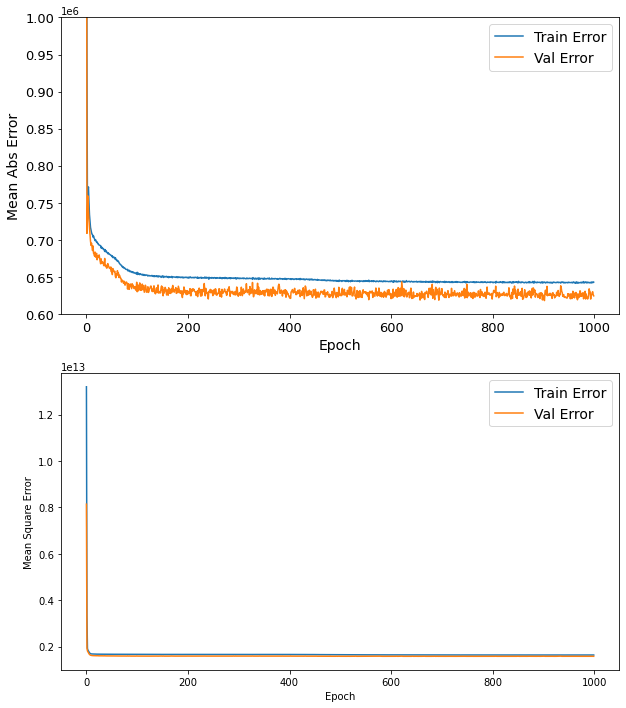

In [16]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(10,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch', fontsize=14)
    plt.ylabel('Mean Abs Error', fontsize=14)
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([600000,1000000])
    plt.legend(fontsize=14)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    #plt.ylim([0,20000])
    plt.legend(fontsize=14)
    plt.show()

plot_history(history)

In [13]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} local1".format(mae))

182/182 - 0s - loss: 1633943814144.0000 - mae: 635606.5625 - mse: 1633943814144.0000 - 250ms/epoch - 1ms/step
테스트 세트의 평균 절대 오차: 635606.56 local1
